<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2026/blob/master/02_3_SVD_Example_2_RandomMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAE 5020 – SVD of a Random Matrix (100 × 200)  
**Version:** Economy SVD (full_matrices=False)


**Objective**  
Demonstrate the Singular Value Decomposition (SVD) on a random matrix with prescribed mean and standard deviation, and visualize the factors.

**Plotting note (important):**  
When we visualize matrices with `imshow`, the top row shown corresponds to row index 0. We set `origin="upper"` so the diagonal in \(\Sigma\) appears from **top-left to bottom-right**.


## 1. Imports and setup

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 11})
np.random.seed(42)

def plot_matrix(M, title, cmap="viridis", vmin=None, vmax=None):
    """Plot a matrix using image coordinates where row 0 is at the top."""
    plt.figure(figsize=(6,3.6))
    plt.imshow(M, origin="upper", aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.title(title)
    plt.xlabel("column index")
    plt.ylabel("row index")
    plt.tight_layout()
    plt.show()


## 2. Create a random matrix



A shape: (100, 200)
A size (# elements): 20000
Empirical mean: 1.1045111183167327
Empirical std : 0.8997705299524172


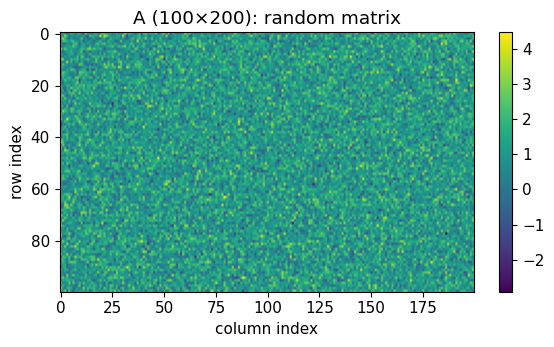

In [46]:
# Matrix dimensions and statistics
m, n = 100, 200
mu, sigma = 1.1, 0.9

# Generate random matrix
A = mu + sigma * np.random.randn(m, n)

print("A shape:", A.shape)
print("A size (# elements):", A.size)
print("Empirical mean:", A.mean())
print("Empirical std :", A.std(ddof=0))

plot_matrix(A, "A (100×200): random matrix", cmap="viridis")


## 3. Compute the SVD


We compute the **economy SVD** with `full_matrices=False`.


In [47]:
U, s, VT = np.linalg.svd(A, full_matrices=False)
Sigma = np.diag(s)

print("U shape :", U.shape,  "| size:", U.size)
print("s shape :", s.shape,  "| size:", s.size)
print("Sigma shape:", Sigma.shape, "| size:", Sigma.size)
print("VT shape:", VT.shape, "| size:", VT.size)


U shape : (100, 100) | size: 10000
s shape : (100,) | size: 100
Sigma shape: (100, 100) | size: 10000
VT shape: (100, 200) | size: 20000


## 4. Plot the matrices (A, U, Σ, Vᵀ)

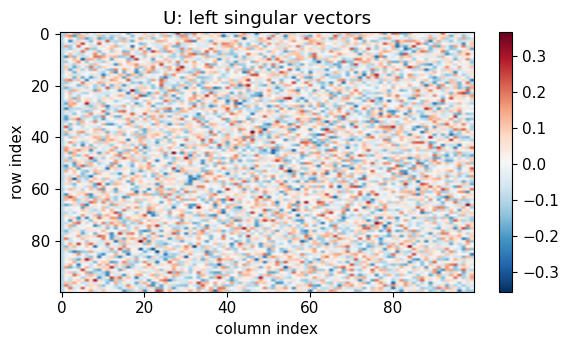

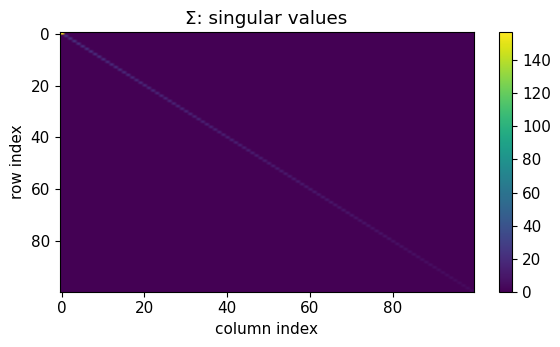

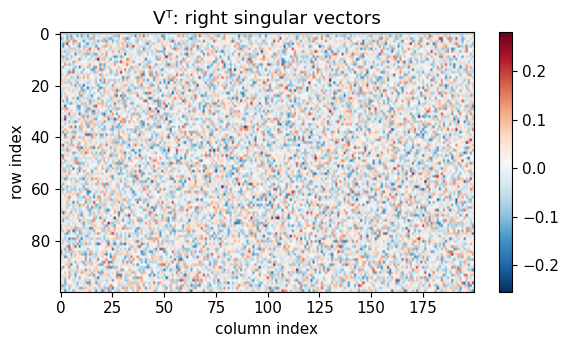

In [50]:
plot_matrix(U,     "U: left singular vectors", cmap="RdBu_r")
plot_matrix(Sigma, "Σ: singular values", cmap="viridis")
plot_matrix(VT,    "Vᵀ: right singular vectors", cmap="RdBu_r")


## 5. Singular value spectrum

For a random matrix, singular values typically **do not** decay as fast as for structured/low-rank data.


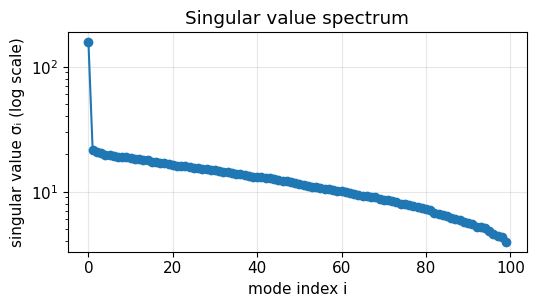

Singular values: [156.9308674   21.47804023  20.60817989  20.45785658  19.82624927]


In [53]:
plt.figure(figsize=(5.5,3.2))
plt.semilogy(s, "o-")
plt.xlabel("mode index i")
plt.ylabel("singular value σᵢ (log scale)")
plt.title("Singular value spectrum")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("Singular values:", s[:5])

## 6. Reconstruction check


In [54]:
A_hat = U @ Sigma @ VT
rel_error = np.linalg.norm(A - A_hat) / np.linalg.norm(A)
print("Relative reconstruction error:", rel_error)


Relative reconstruction error: 2.1753266766702583e-15
